In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_test=pd.read_excel('Example_FI_data.xlsx')

In [13]:
df_test.head()

,Unnamed: 0,Fluid inclusion Name,crystal,filename,Density g/cm3,σ Density g/cm3
0,0,ML22_13_FIA,ML22_13,ML22_13_FIA,0.218518,0.008104
1,1,ML22_13_FIB,ML22_13,ML22_13_FIB,0.204459,0.006925
2,2,ML22_16_FIA,ML22_16,ML22_16_FIA,0.228904,0.003297
3,3,ML22_16_FIB,ML22_16,ML22_16_FIB,0.207728,0.005699
4,4,ML22_16_FIC,ML22_16,ML22_16_FIC,0.208016,0.007868


In [ ]:
# Define the eruption names, colors, and symbols for df
sample_names = ['98_79e', '98_48g', '98_79a','98_48i',   '98_66']

i=0
symbol='^'
for eruption_index, sample in enumerate(sample_names):
    print(sample)

98_79e
98_48g
98_79a
98_48i
98_66


ML22
9
MLP
64


C:\Users\penny\AppData\Local\Temp\ipykernel_24436\3345968273.py:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(x, y, s=30, marker='x', edgecolors='k', c='k', zorder=100)
C:\Users\penny\AppData\Local\Temp\ipykernel_24436\3345968273.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  s = ax1.scatter(x, y, marker='^', s=50, edgecolors='k', linewidths=0.5,
C:\Users\penny\AppData\Local\Temp\ipykernel_24436\3345968273.py:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(x, y, s=30, marker='x', edgecolors='k', c='k', zorder=100)
C:\Users\penny\AppData\Local\Temp\ipykernel_24436\3345968273.py:47: UserWarning: No data for

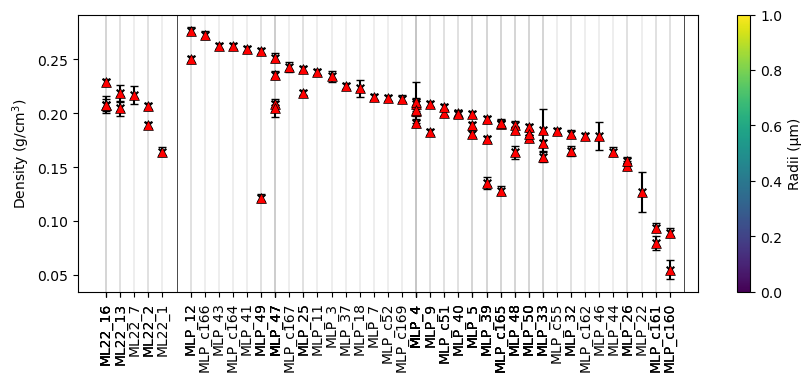

In [15]:

# Sample DataFrame for demonstration
# Assuming df is already defined

# Extract the characters before the second underscore




fig, ax1 = plt.subplots(1, 1, figsize=(10, 3.6))

# Loop through each Fluid inclusion Name sample
x_offset = 0  # To ensure each Fluid inclusion Name starts at a new section along the x-axis

xticks = []
xtick_labels = []

# Define the eruption names, colors, and symbols for df
sample_names = ['ML22', 'MLP'] # these are the unique sample codes in your sample set, so it plots each sample separatly

i=0
symbol='^'
for eruption_index, sample in enumerate(sample_names):
    print(sample)
    df = df_test.loc[df_test['Fluid inclusion Name'].str.contains(sample)]
    print(len(df))
    # Filter out groups with only one row
    group_counts = df['crystal'].value_counts()
    filtered_df = df[df['crystal'].isin(group_counts[group_counts > 0].index)]

    # Calculate range for each group and sort groups by max value
    group_ranges = filtered_df.groupby('crystal')['Density g/cm3'].apply(lambda x: x.max())
    sorted_groups = group_ranges.sort_values(ascending=False).index

    # Plot
    for i, group in enumerate(sorted_groups):
        group_data = filtered_df[filtered_df['crystal'] == group]
        x = np.full(group_data.shape[0], x_offset + i + 1)  # Equally spaced x positions within this Fluid inclusion Name section
        y = group_data['Density g/cm3']
        yerr = group_data['σ Density g/cm3']
        
        ax1.errorbar(x, y, yerr=yerr, fmt='^', color='red', ms=0,
                     label=f'{i}' if i == 0 else "", alpha=1, capsize=3, mec='k', ecolor='k')
        
        ax1.scatter(x, y, s=30, marker='x', edgecolors='k', c='k', zorder=100)
        
        #  you can color by whatever variable you want, e.g. Radii, by doing group_data['Av_radi']
        s = ax1.scatter(x, y, marker='^', s=50, edgecolors='k', linewidths=0.5,
                        c='red', cmap='hot', vmin=0, vmax=30, zorder=100)
        
        xticks.extend(x)
        xtick_labels.extend([group] * len(x))
    
    # Add a vertical line to separate different Fluid inclusion Names
    x_offset += len(sorted_groups) + 1
    ax1.axvline(x=x_offset, color='black', linestyle='-', lw=0.5)

#plt.xlabel('Crystal')
fig.colorbar(s, ax=ax1, label='Radii (μm)')
plt.ylabel('Density (g/cm$^3$)')

plt.grid(axis='x', linestyle='-', linewidth=0.3)

ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels, rotation=90)

fig.savefig('Density_differences.png', dpi=300, transparent=True, bbox_inches='tight')
